0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]

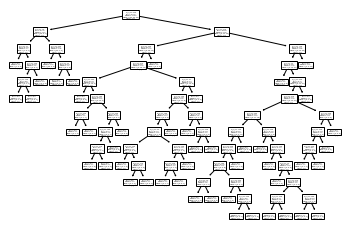

[0.72326037 0.27673963]


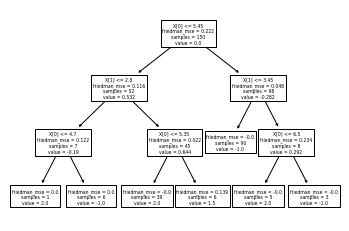

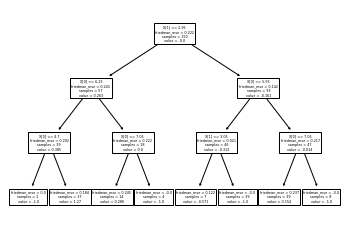

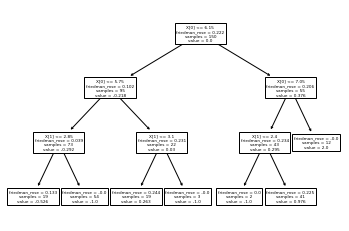

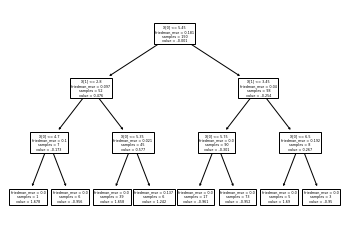

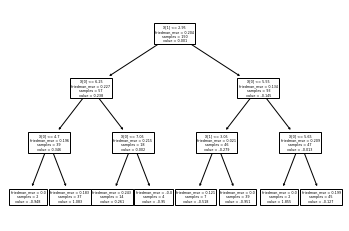

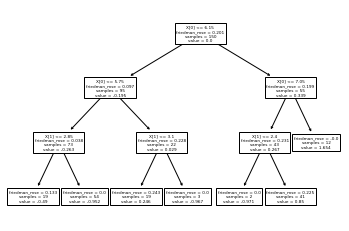

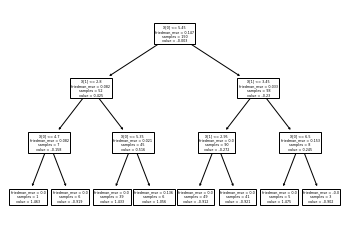

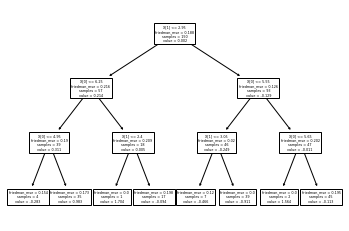

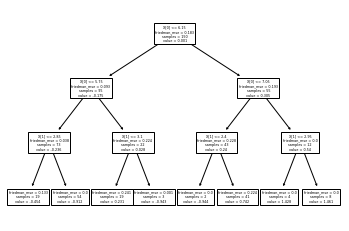

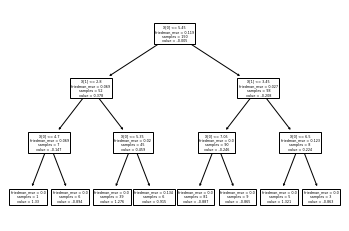

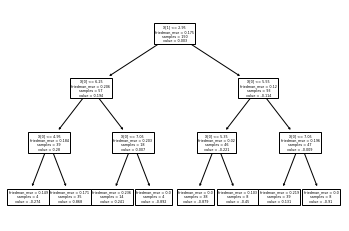

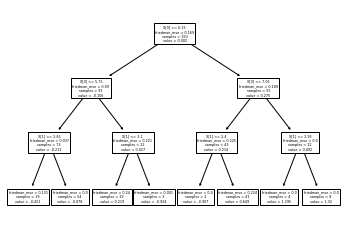

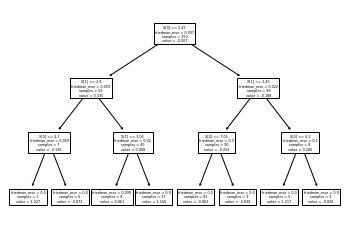

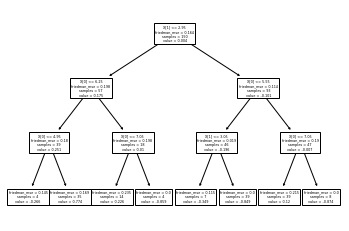

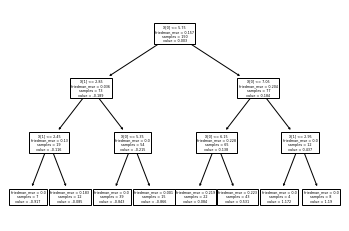

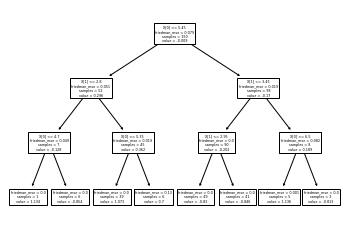

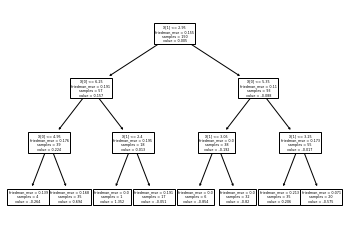

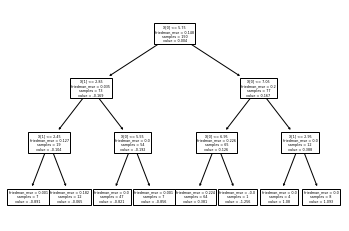

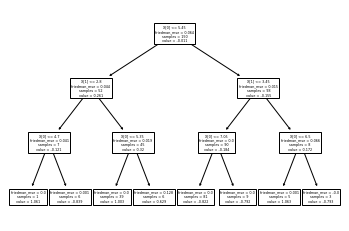

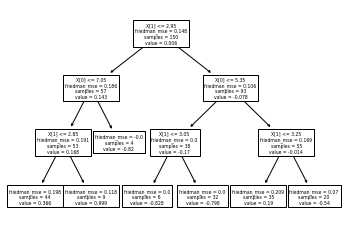

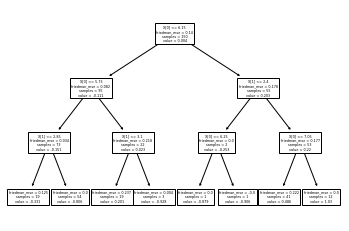

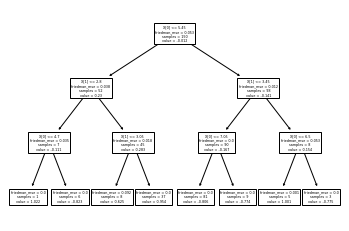

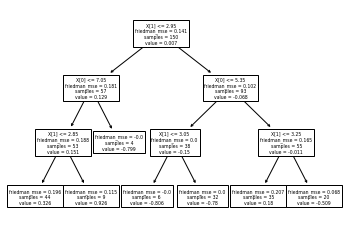

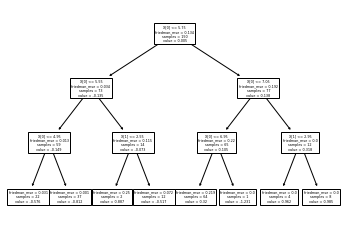

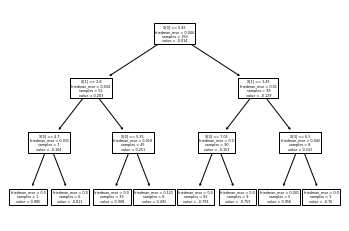

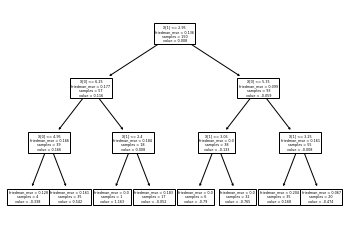

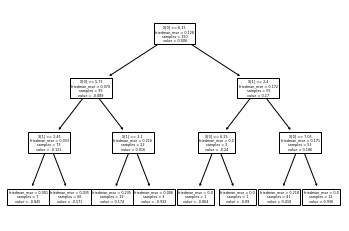

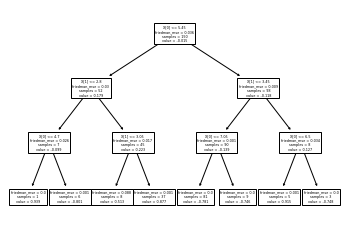

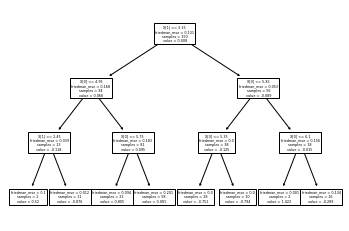

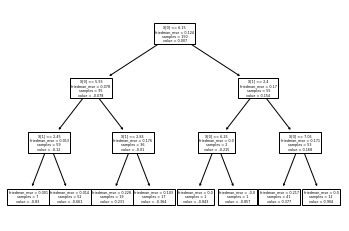

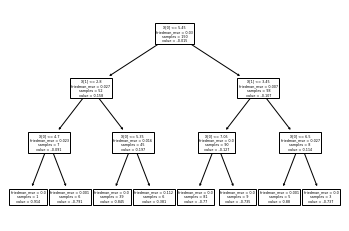

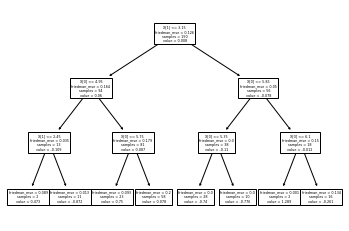

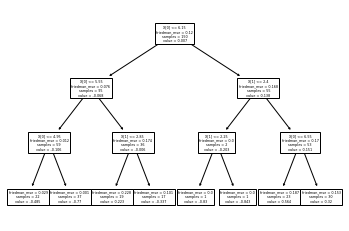

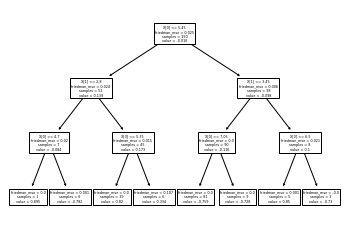

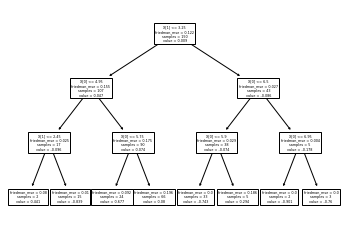

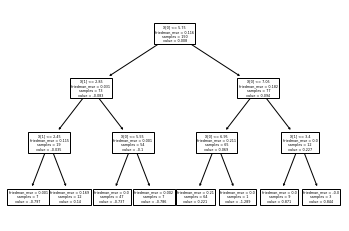

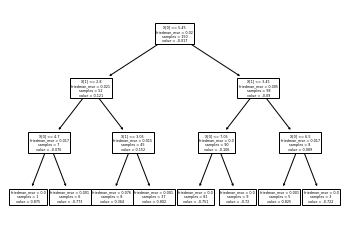

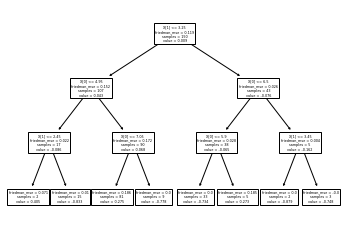

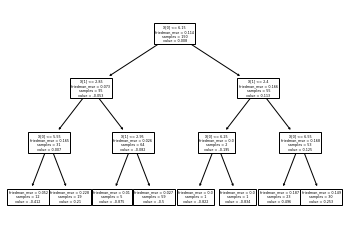

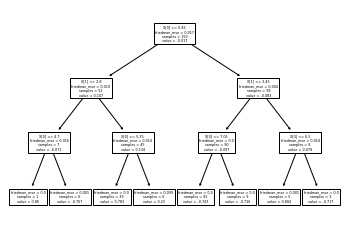

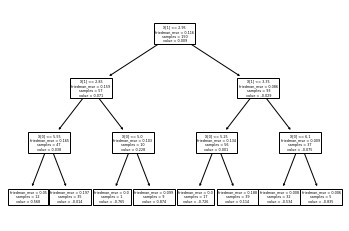

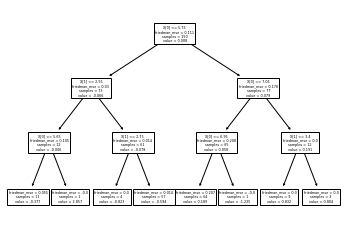

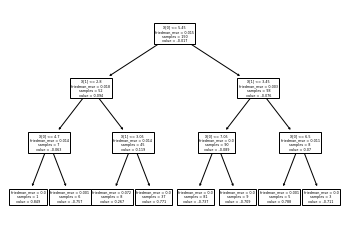

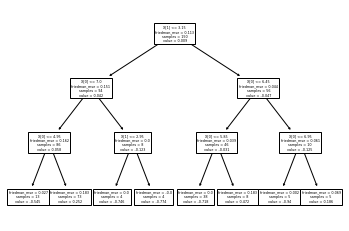

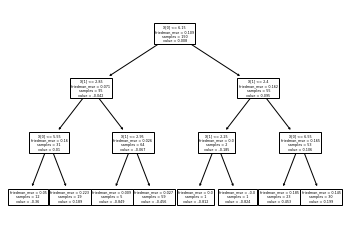

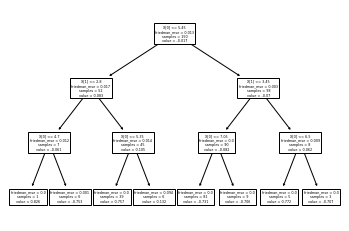

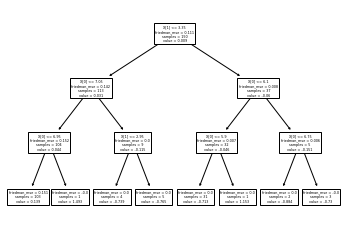

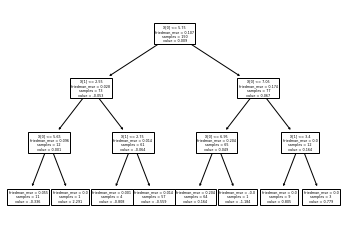

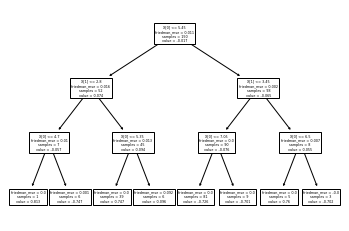

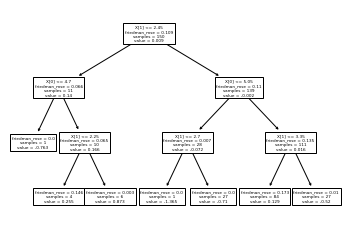

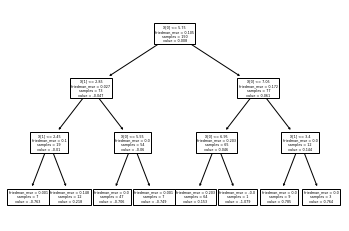

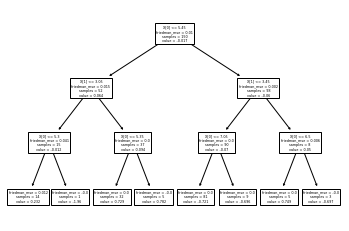

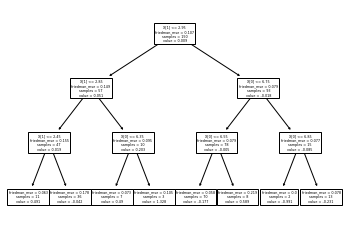

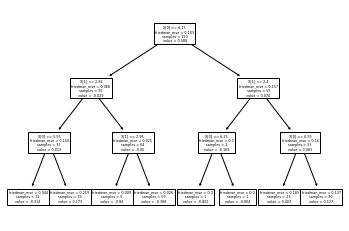

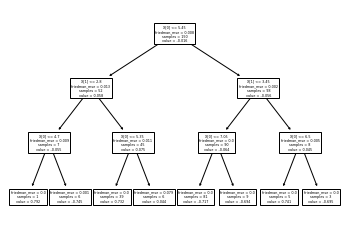

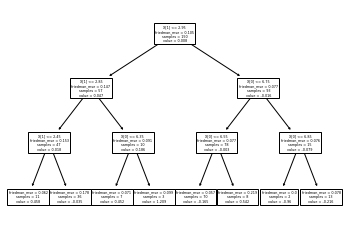

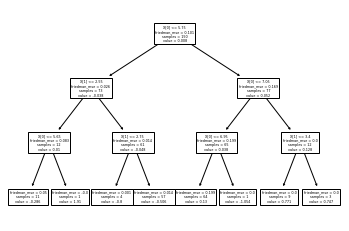

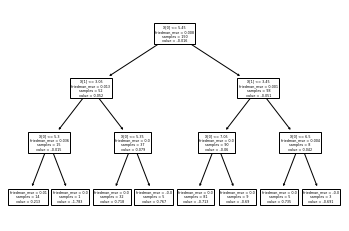

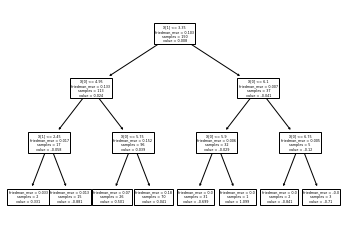

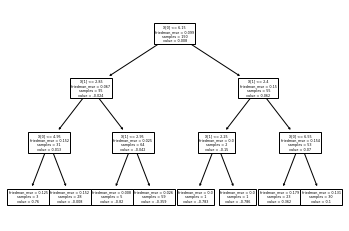

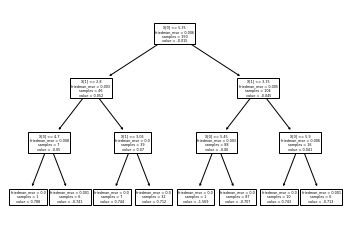

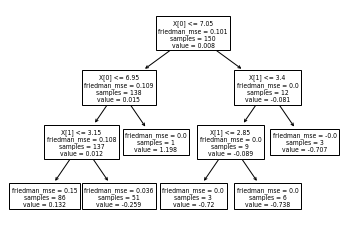

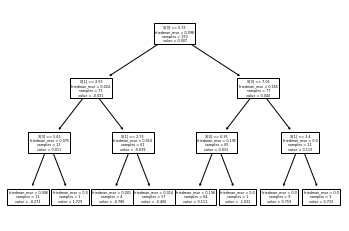

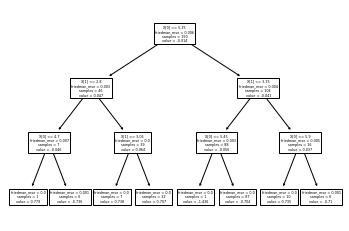

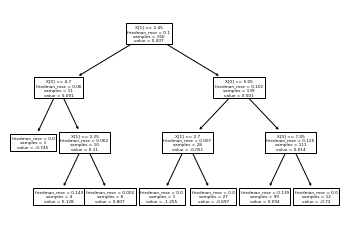

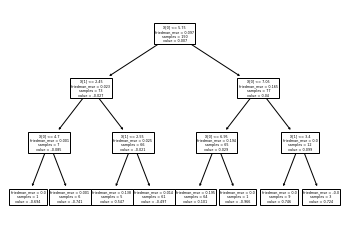

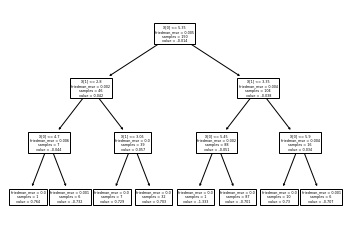

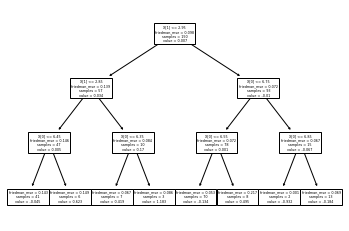

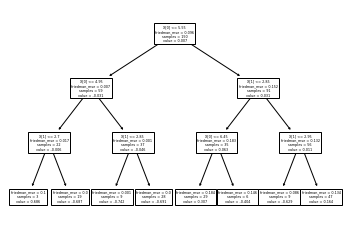

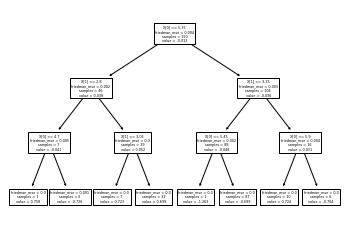

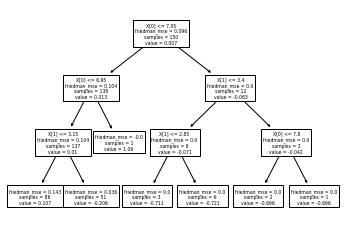

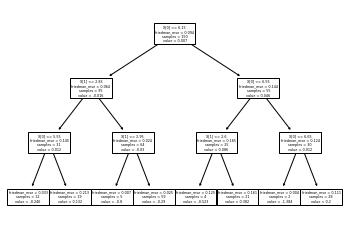

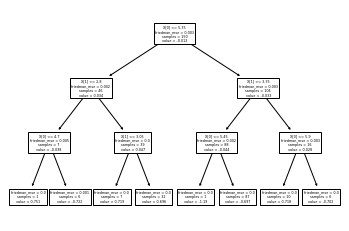

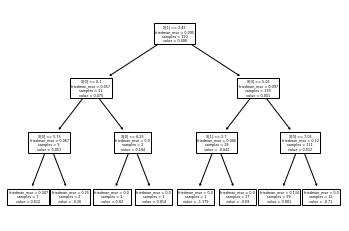

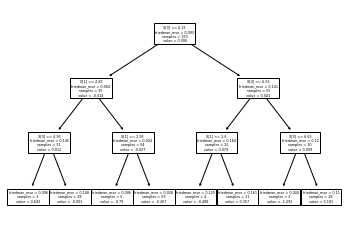

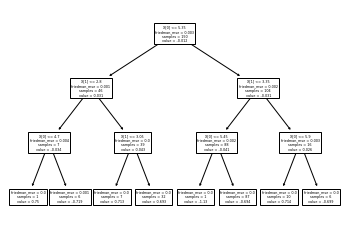

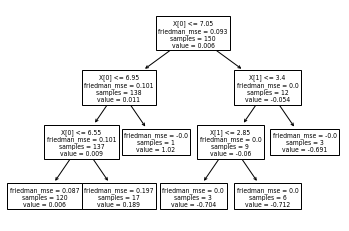

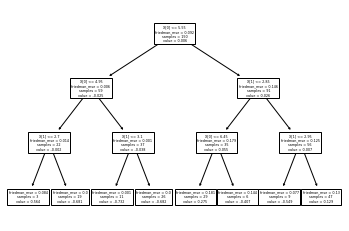

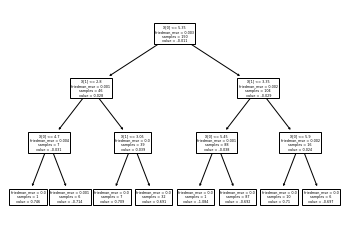

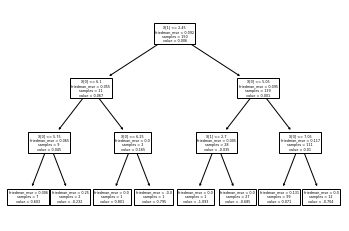

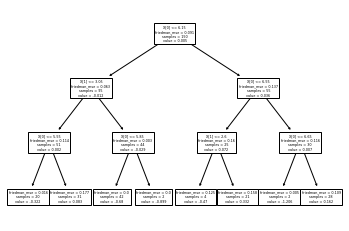

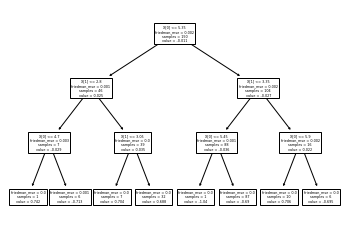

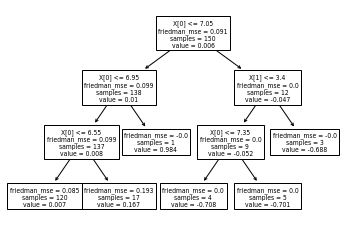

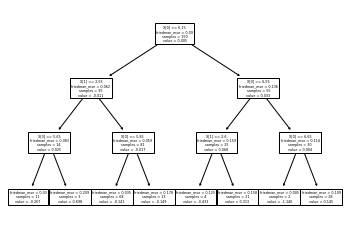

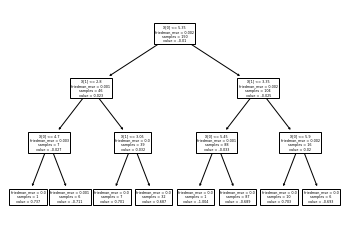

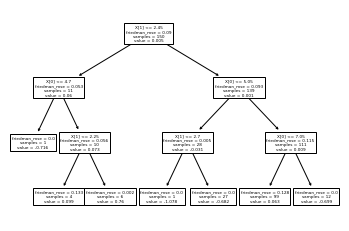

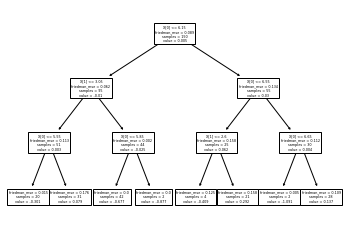

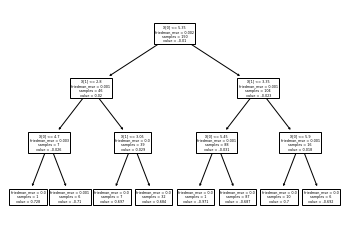

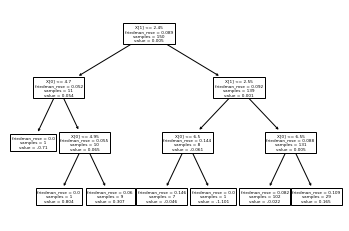

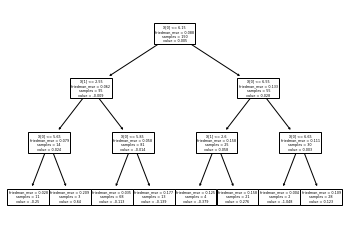

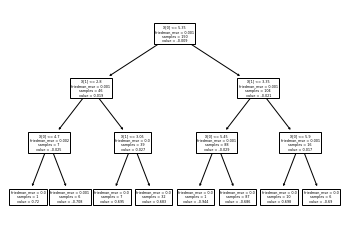

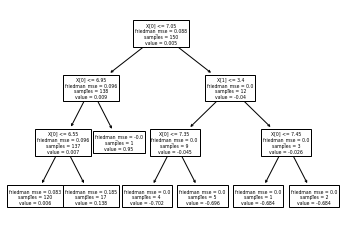

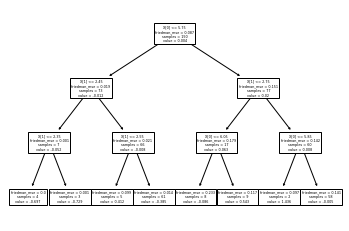

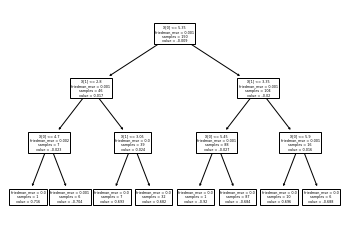

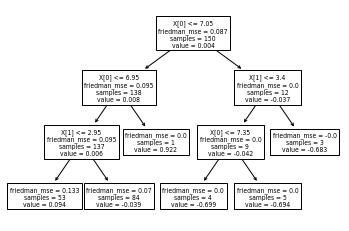

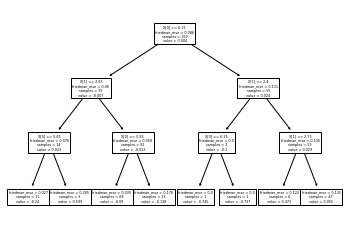

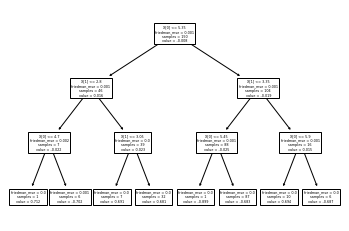

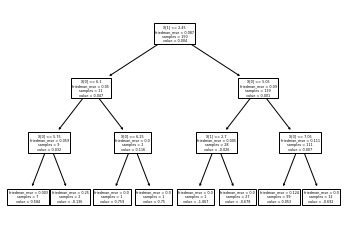

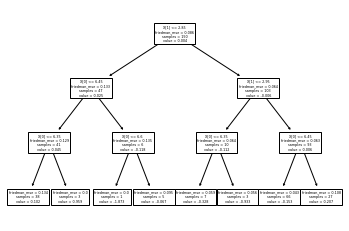

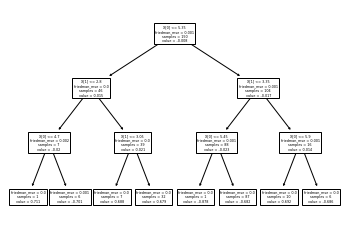

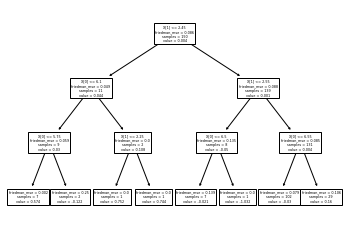

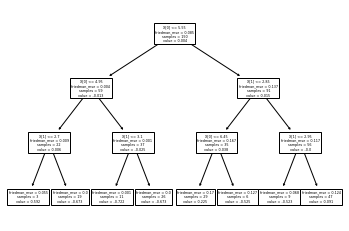

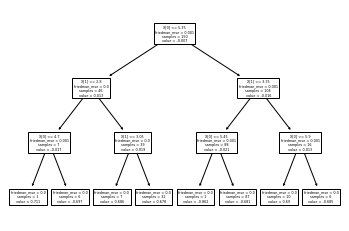

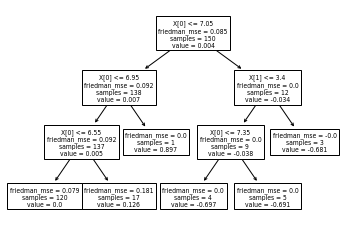

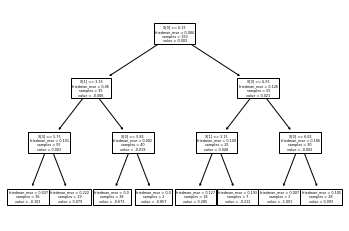

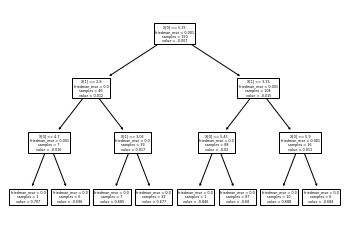

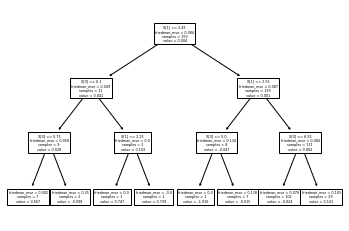

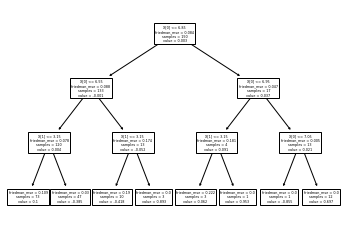

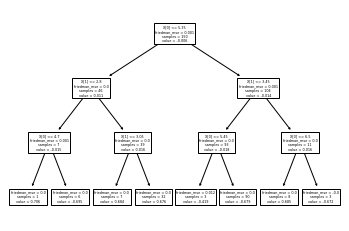

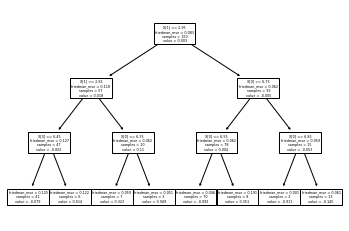

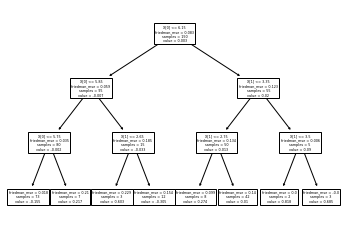

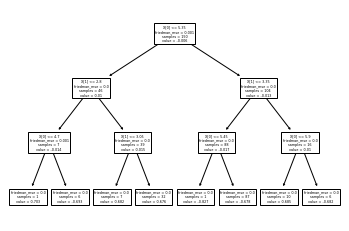

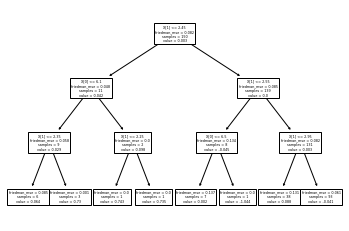

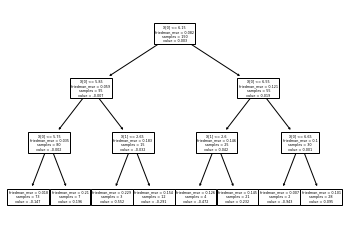

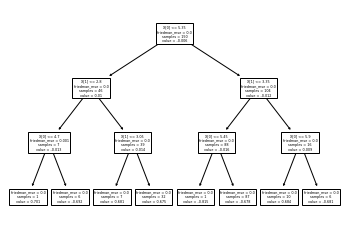

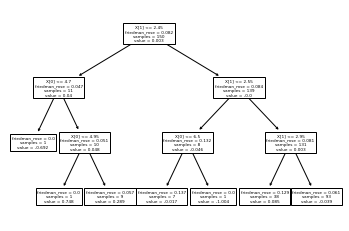

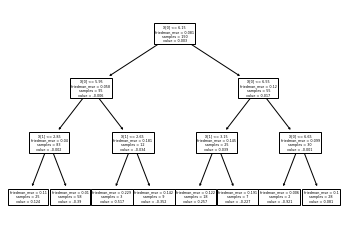

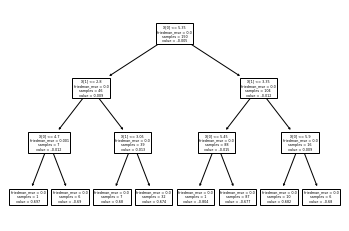

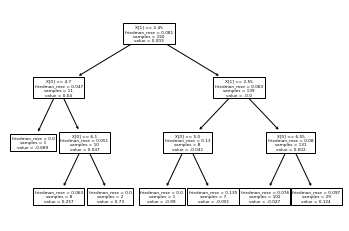

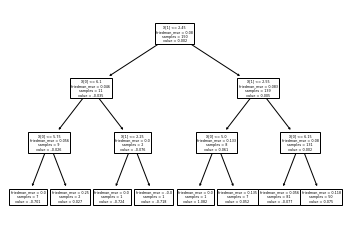

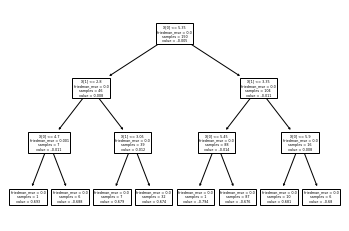

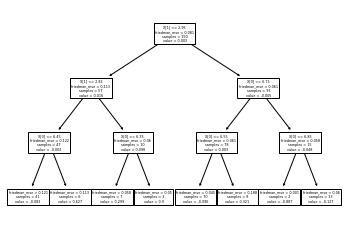

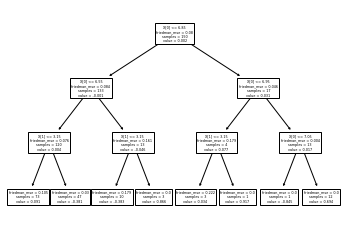

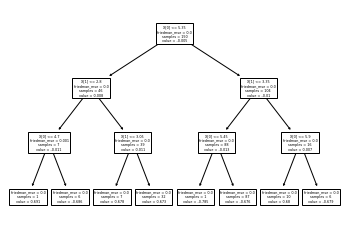

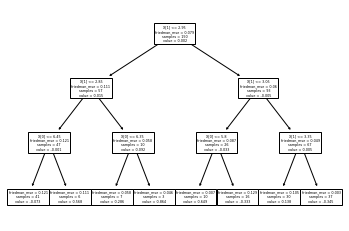

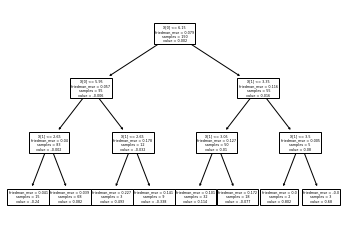

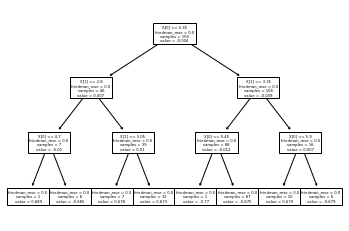

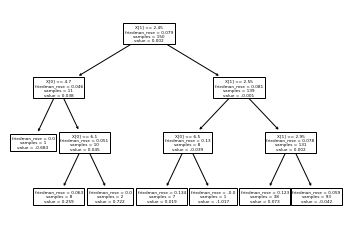

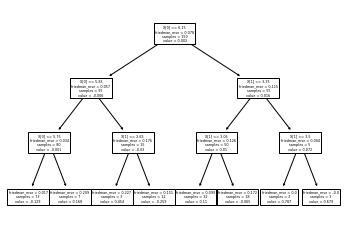

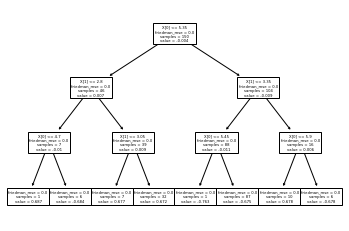

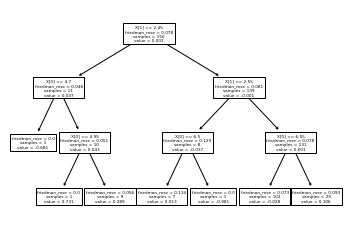

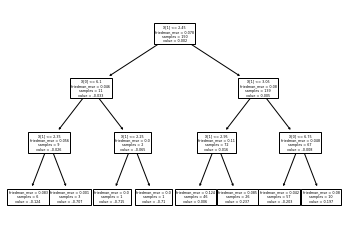

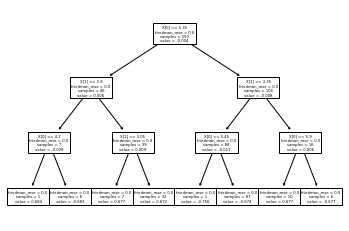

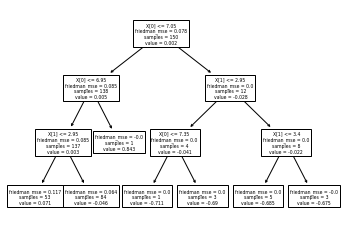

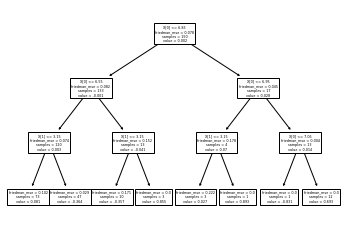

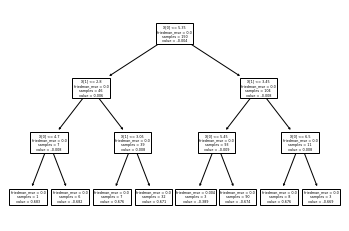

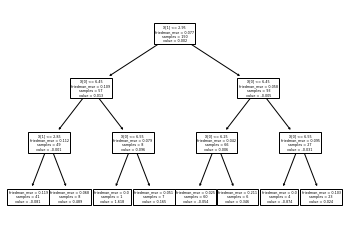

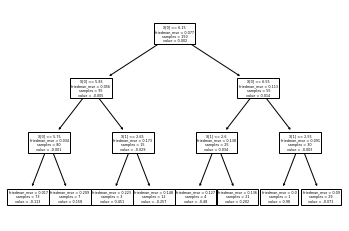

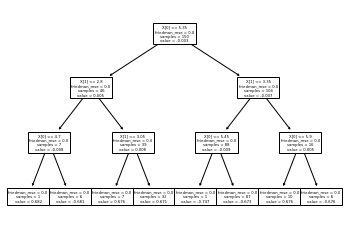

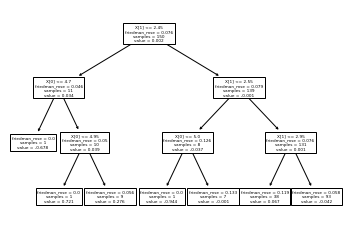

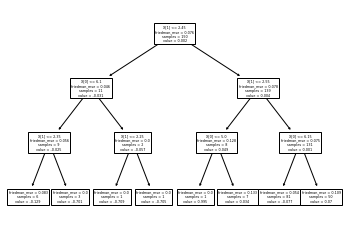

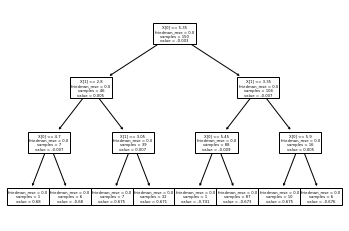

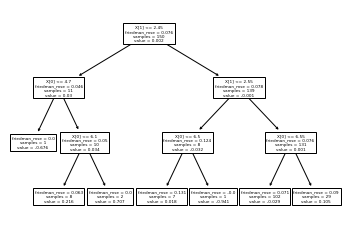

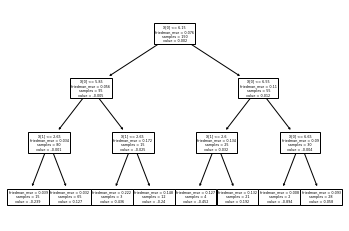

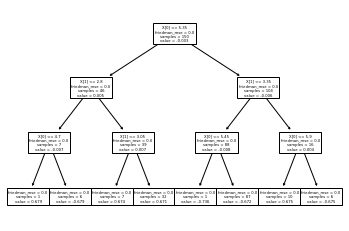

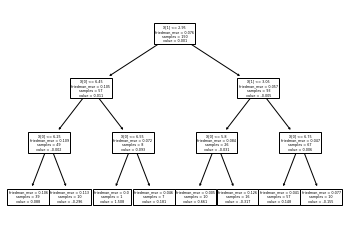

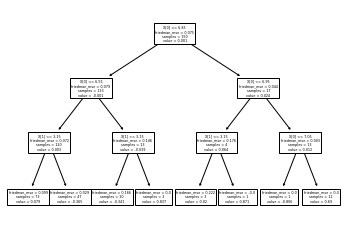

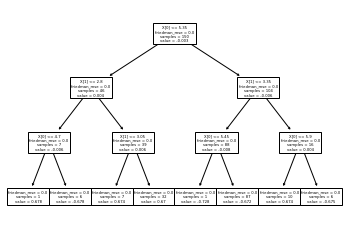

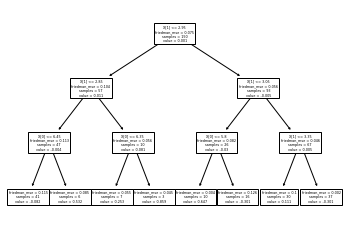

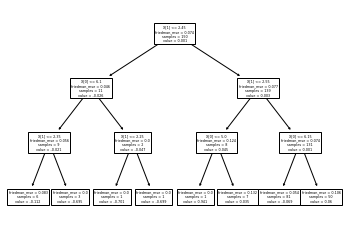

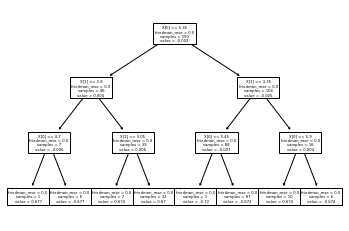

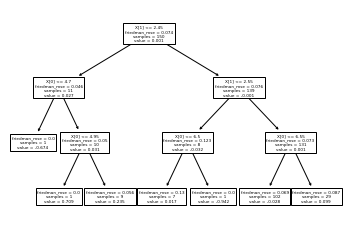

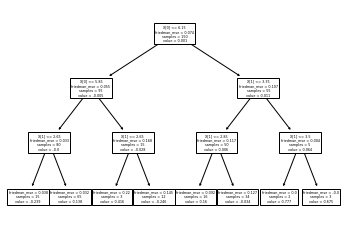

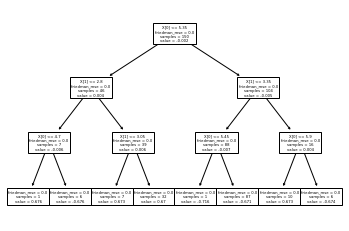

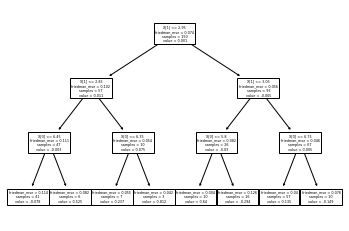

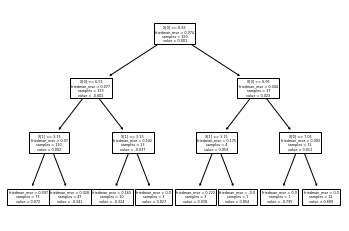

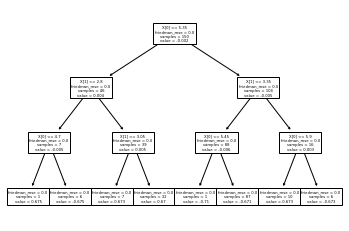

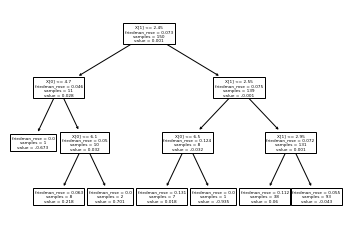

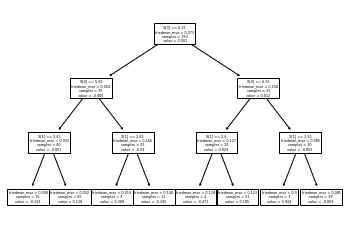

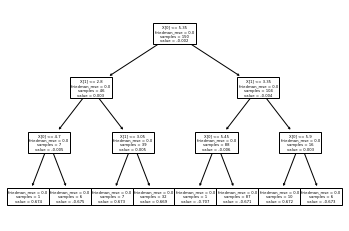

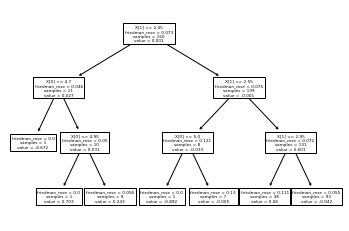

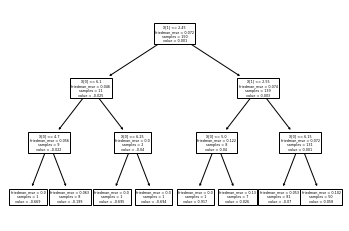

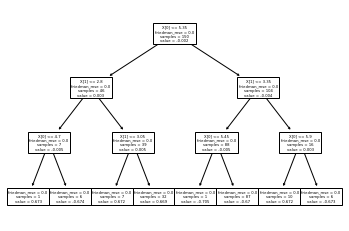

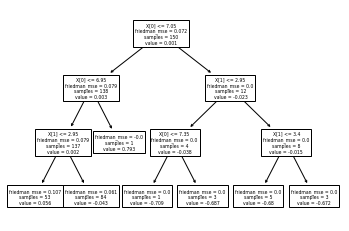

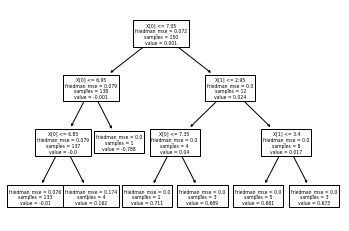

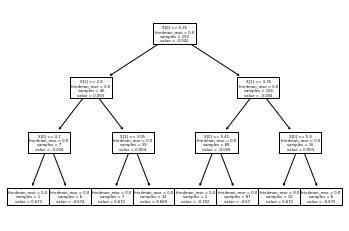

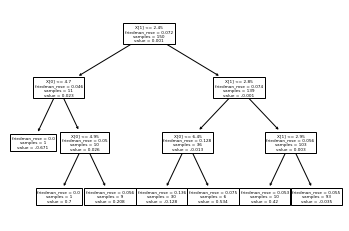

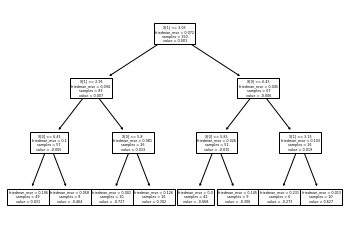

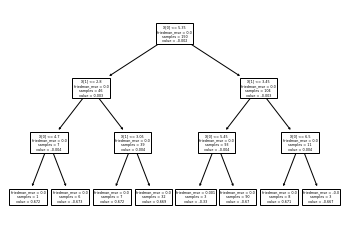

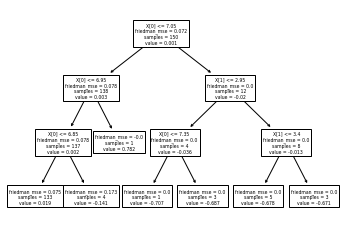

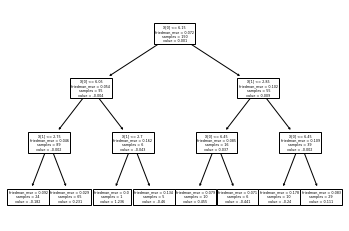

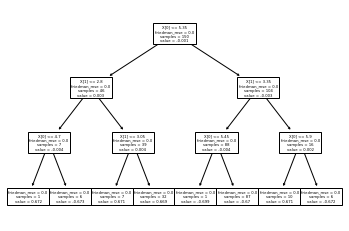

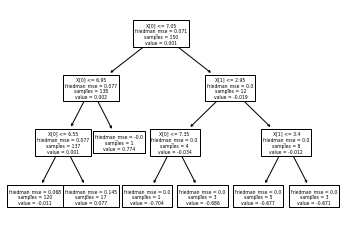

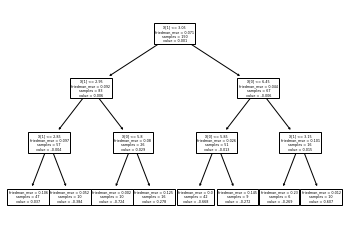

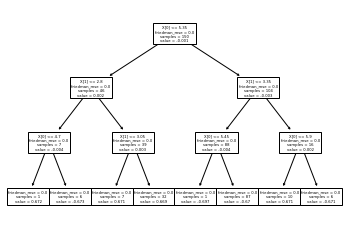

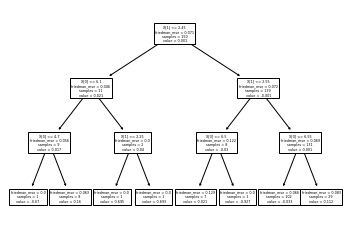

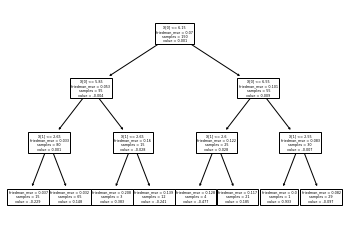

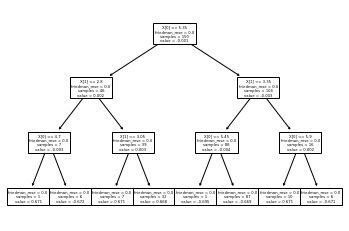

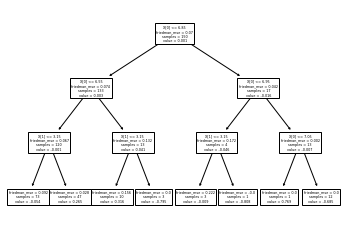

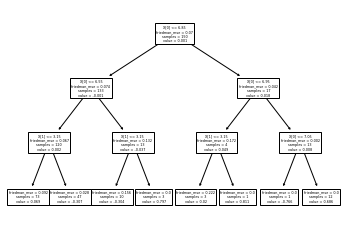

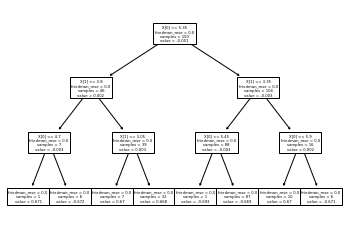

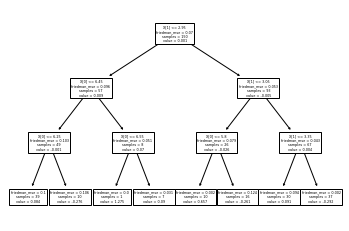

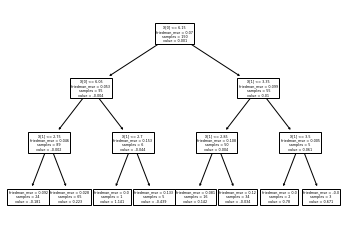

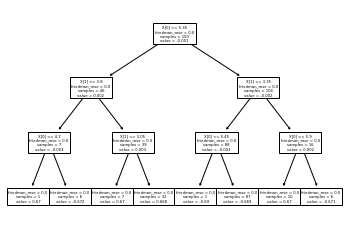

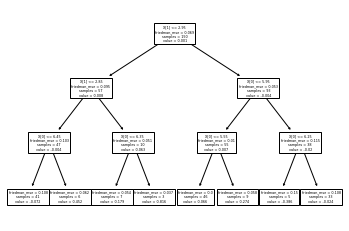

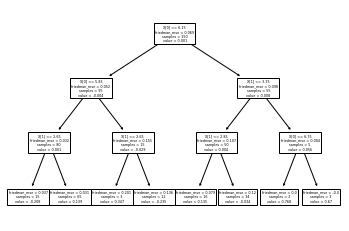

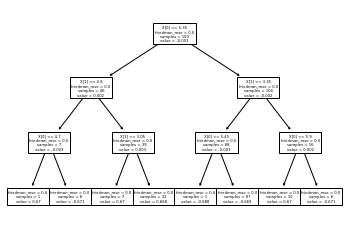

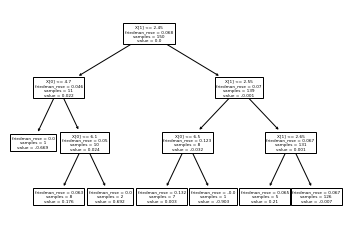

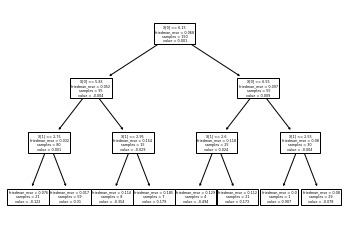

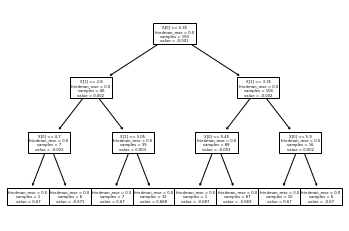

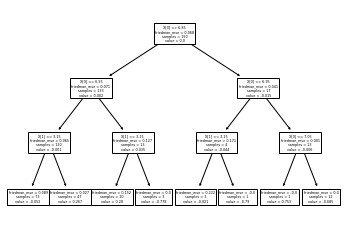

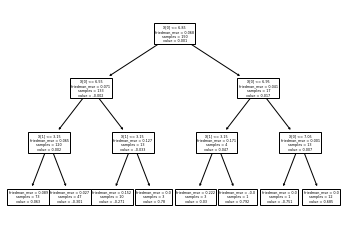

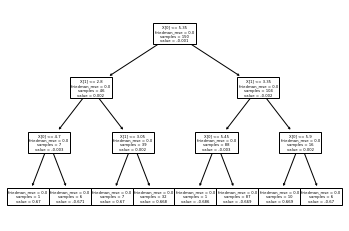

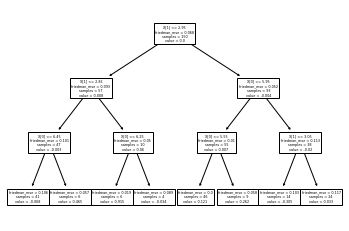

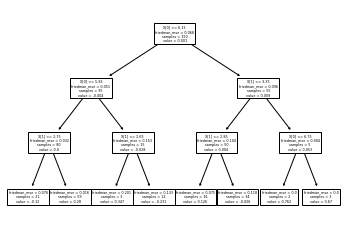

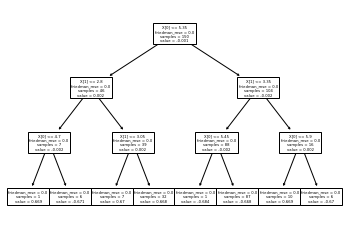

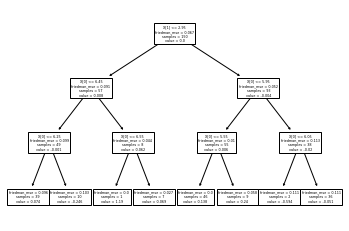

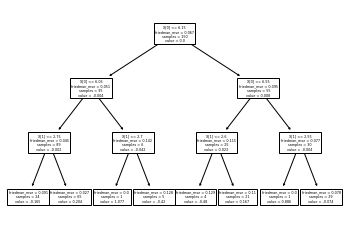

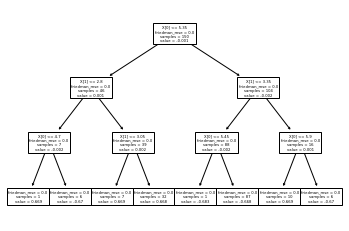

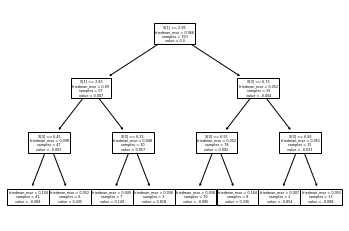

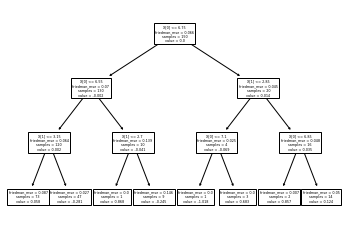

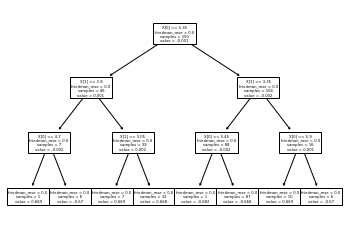

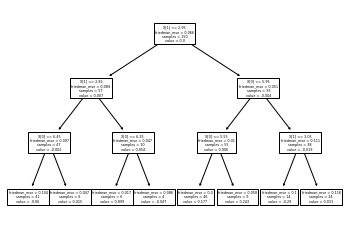

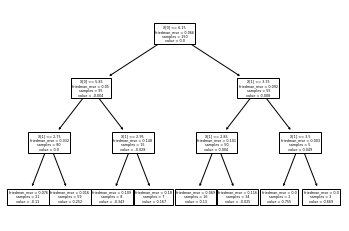

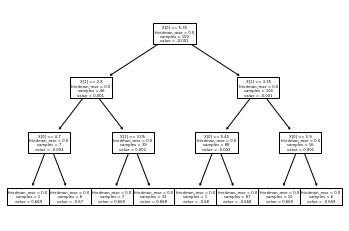

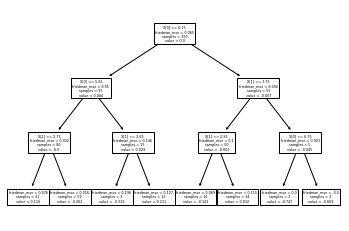

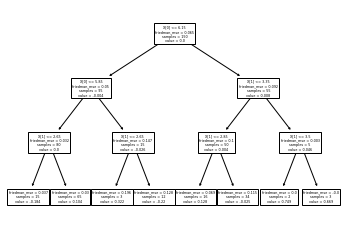

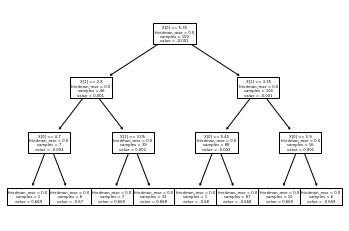

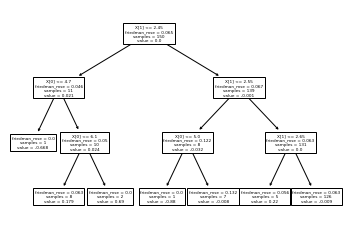

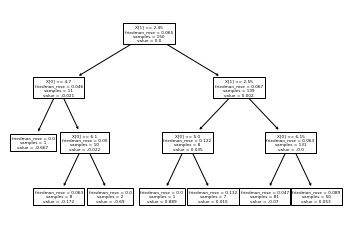

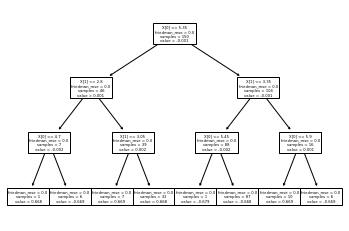

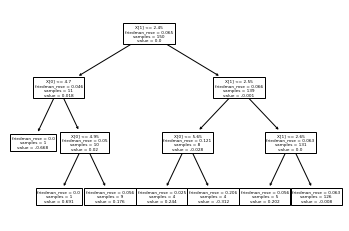

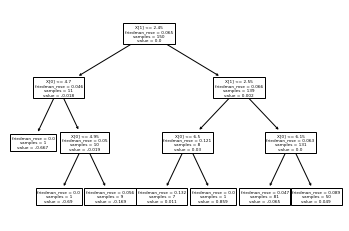

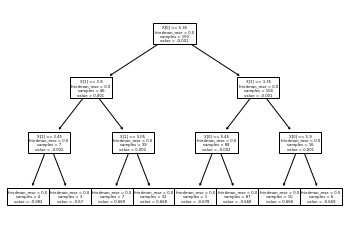

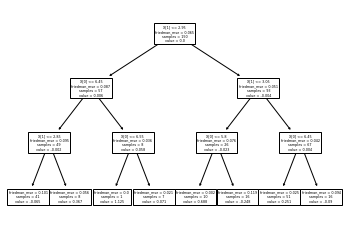

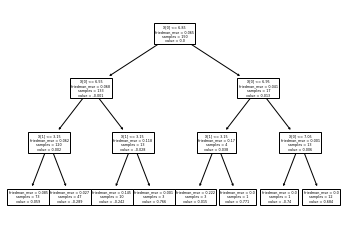

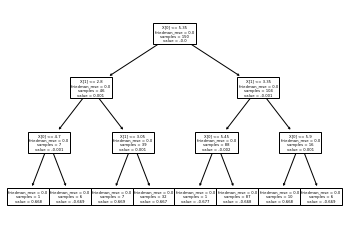

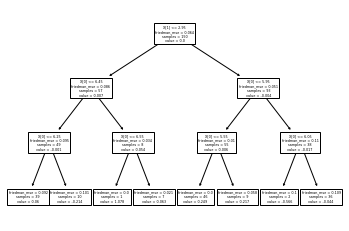

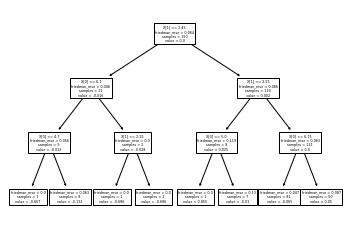

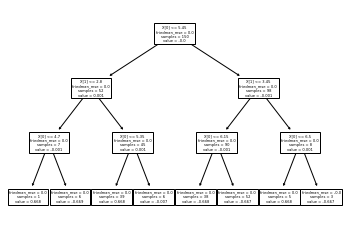

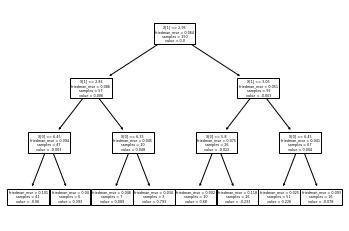

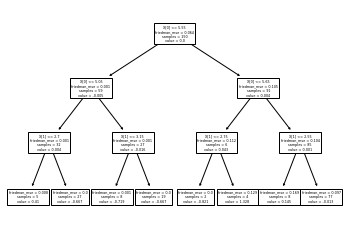

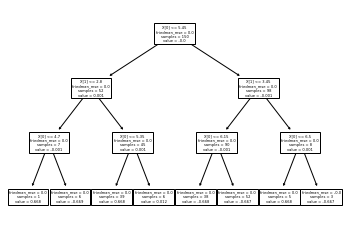

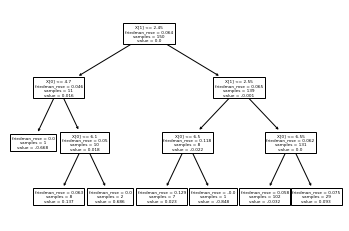

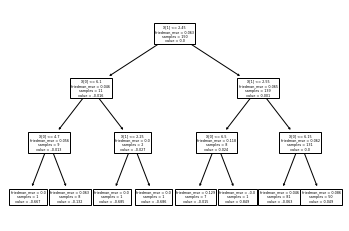

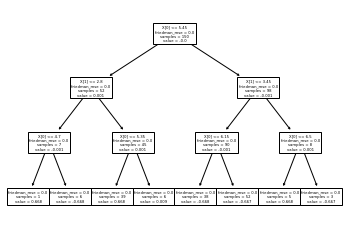

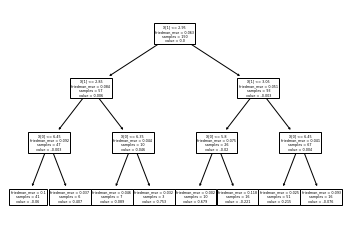

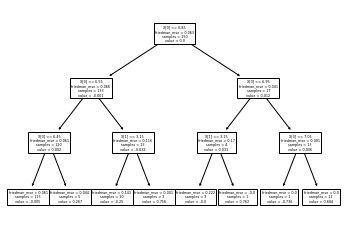

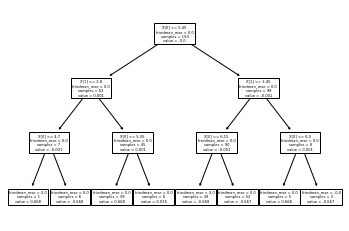

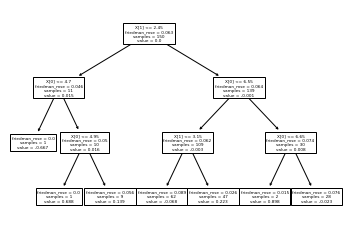

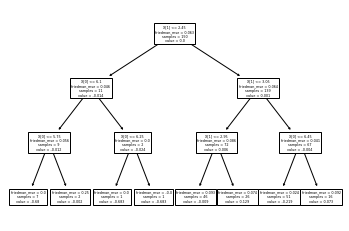

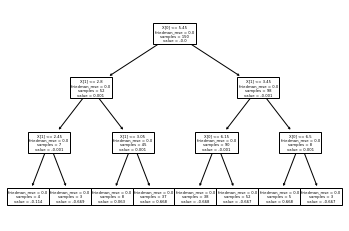

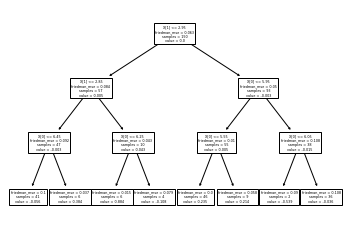

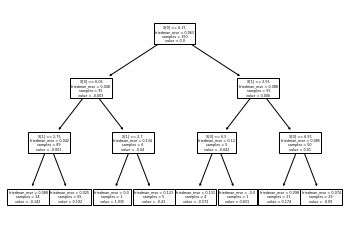

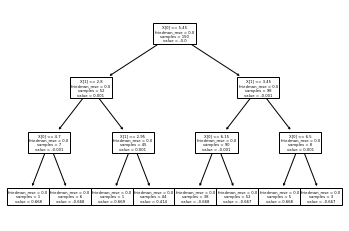

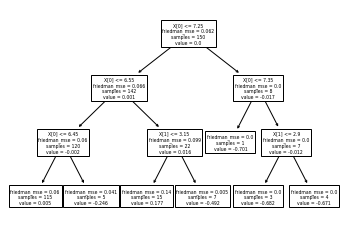

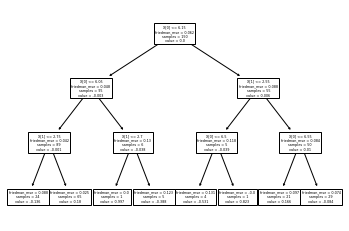

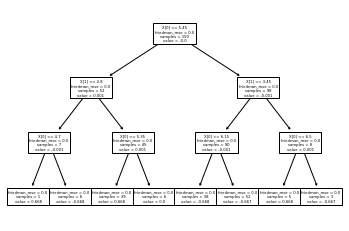

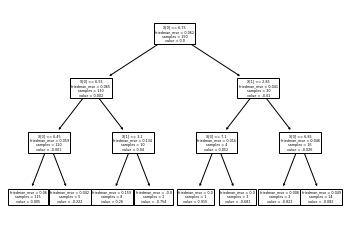

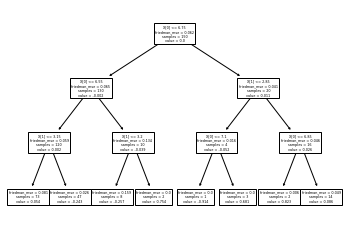

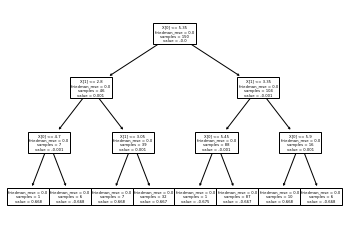

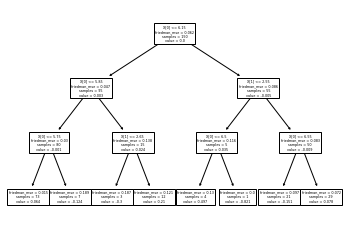

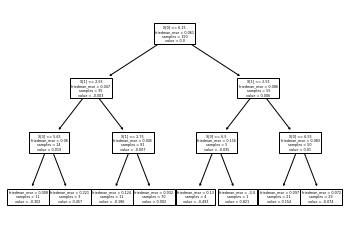

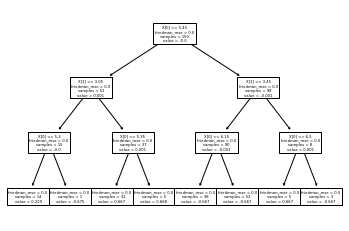

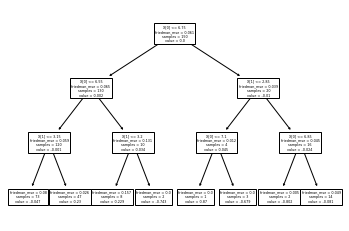

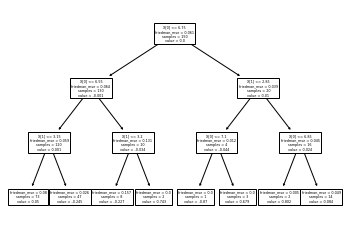

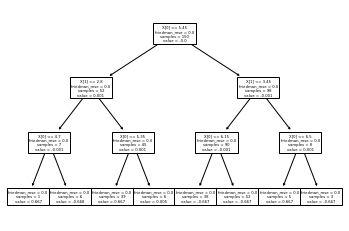

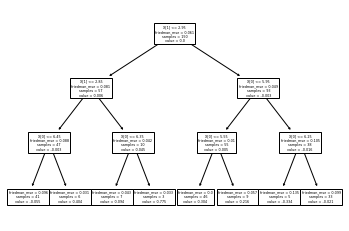

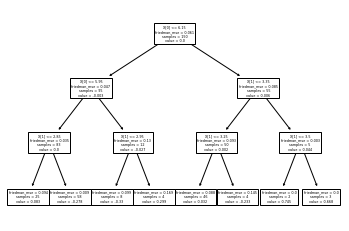

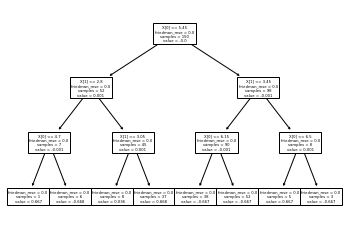

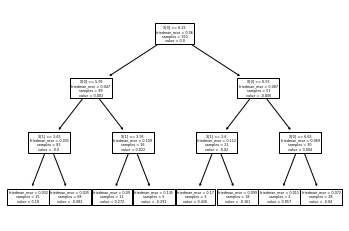

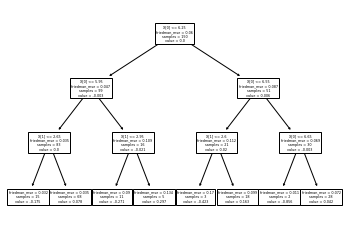

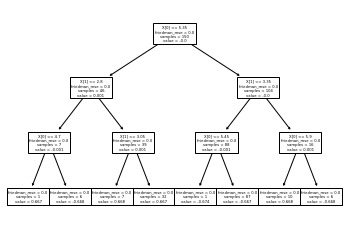

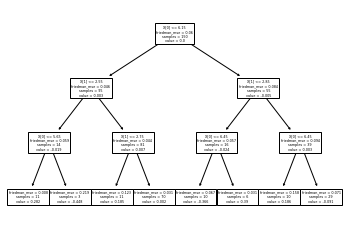

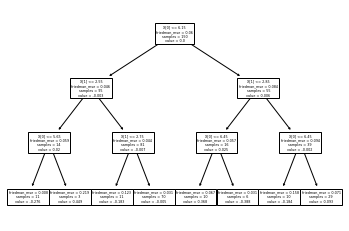

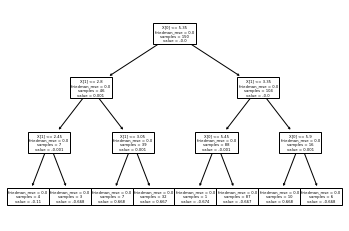

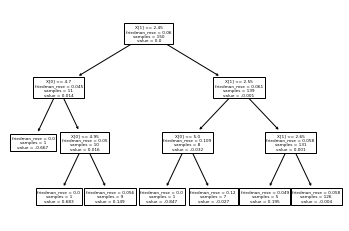

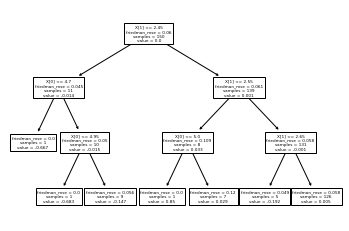

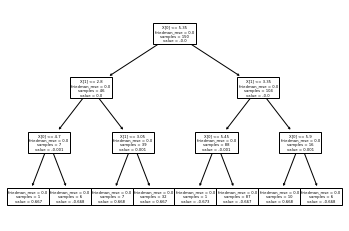

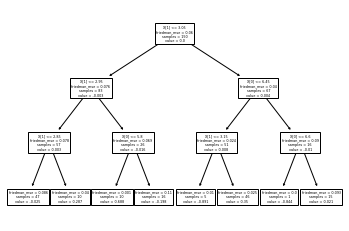

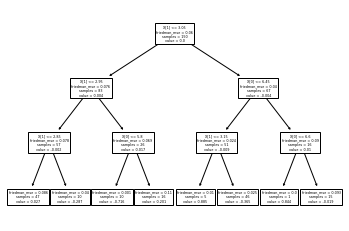

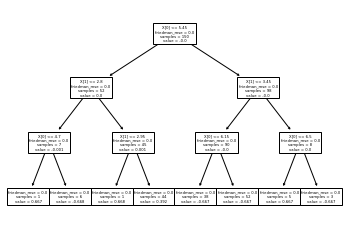

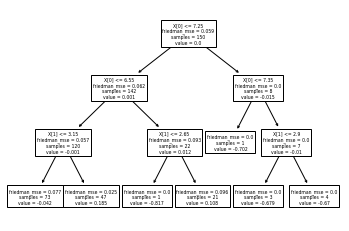

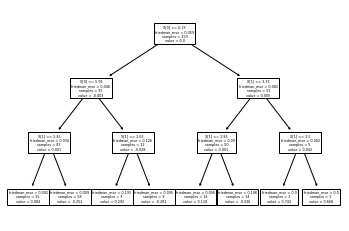

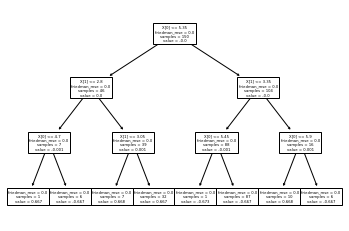

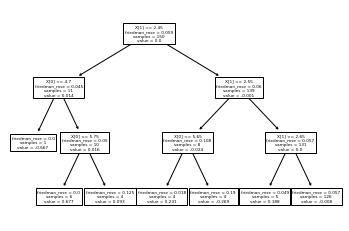

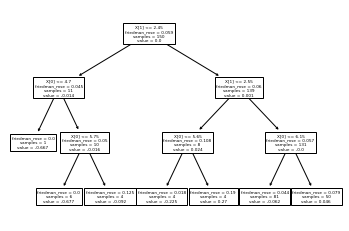

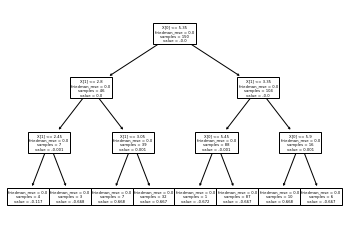

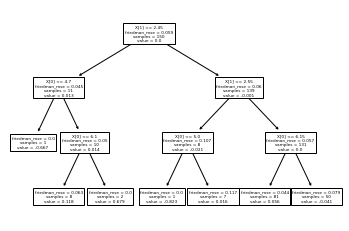

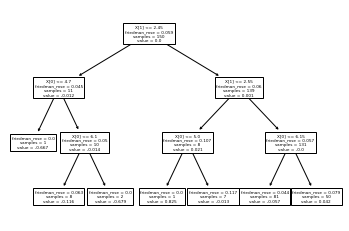

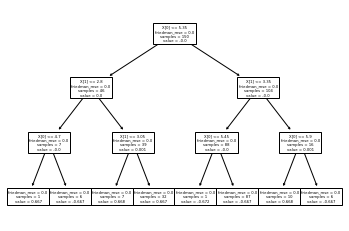

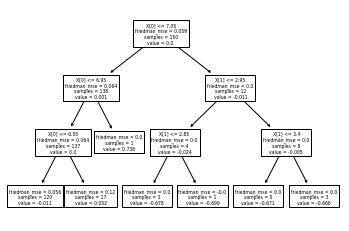

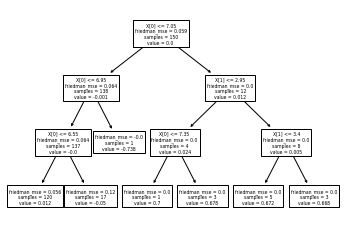

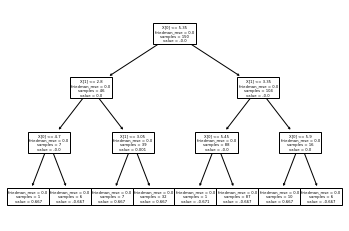

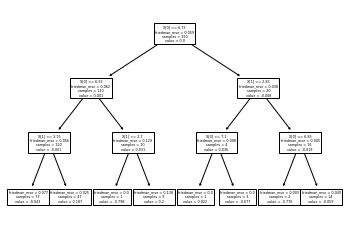

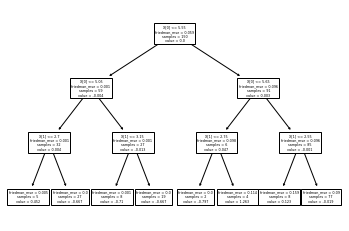

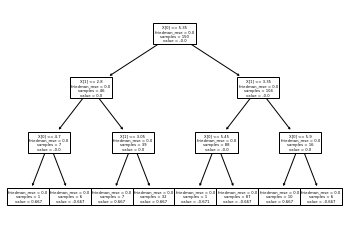

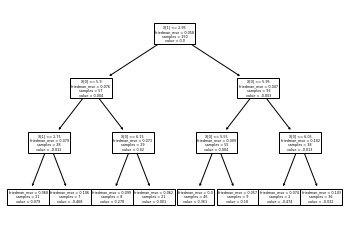

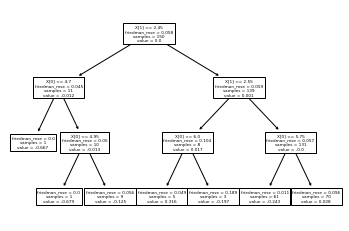

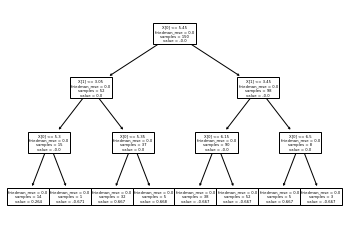

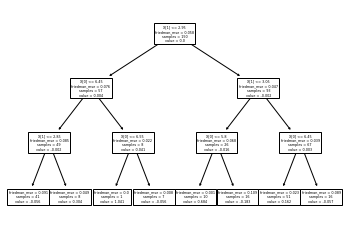

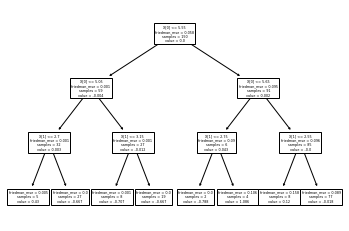

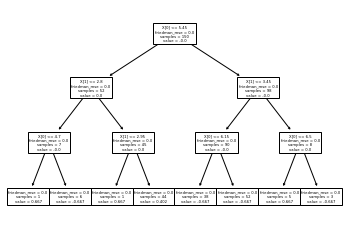

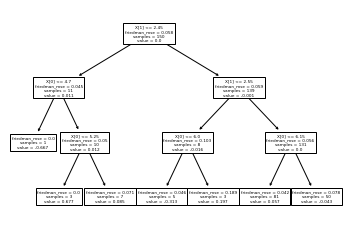

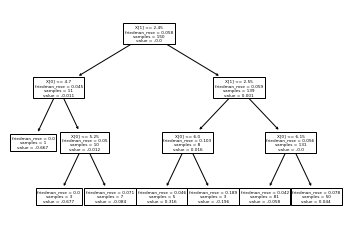

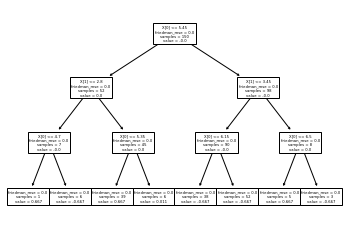

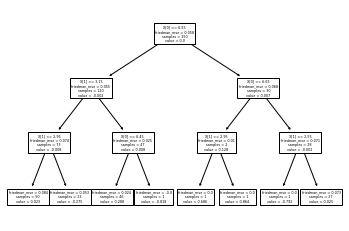

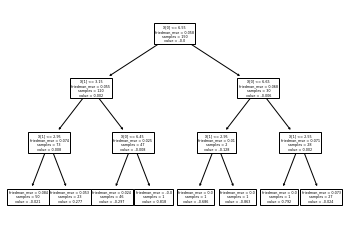

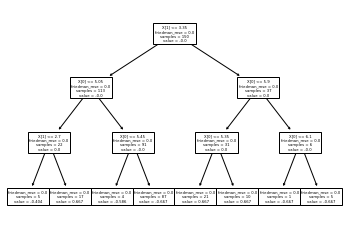

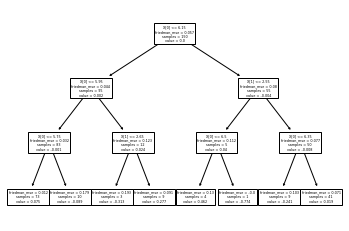

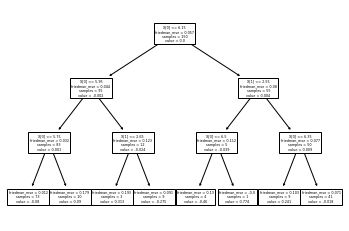

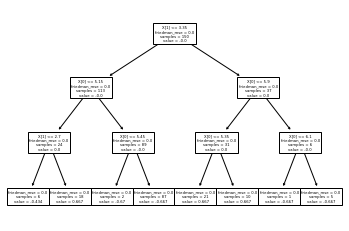

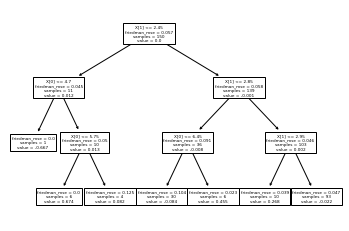

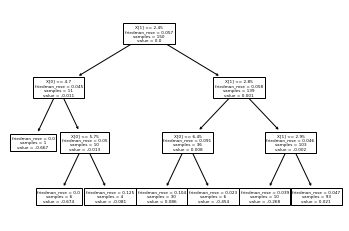

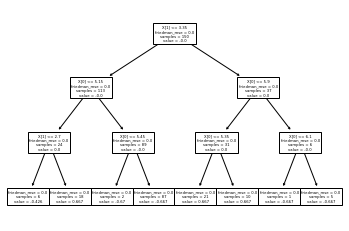

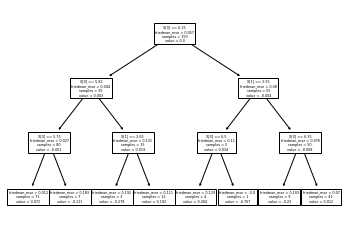

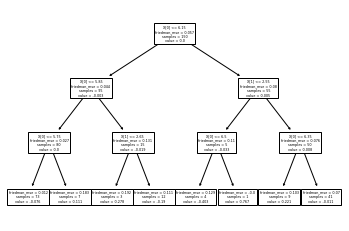

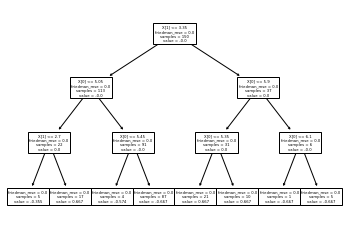

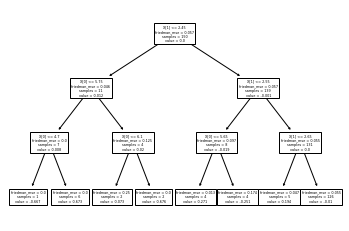

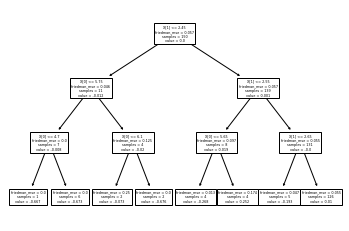

Decision Tree, model, capacity of leafs=2: 0.6176470588235294
Decision Tree, test, capacity of leafs=2: 0.6458333333333334
Decision Tree, model, capacity of leafs=3: 0.7058823529411765
Decision Tree, test, capacity of leafs=3: 0.6041666666666666
Decision Tree, model, capacity of leafs=4: 0.7352941176470589
Decision Tree, test, capacity of leafs=4: 0.625
Decision Tree, model, capacity of leafs=5: 0.7745098039215687
Decision Tree, test, capacity of leafs=5: 0.625
Decision Tree, model, capacity of leafs=6: 0.803921568627451
Decision Tree, test, capacity of leafs=6: 0.7916666666666666
Decision Tree, model, capacity of leafs=7: 0.8333333333333334
Decision Tree, test, capacity of leafs=7: 0.6875
Decision Tree, model, capacity of leafs=8: 0.8529411764705882
Decision Tree, test, capacity of leafs=8: 0.6875
Decision Tree, model, capacity of leafs=9: 0.8627450980392157
Decision Tree, test, capacity of leafs=9: 0.6875
Decision Tree, model, capacity of leafs=10: 0.8725490196078431
Decision Tree, t

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn import datasets
from sklearn import ensemble


iris = datasets.load_iris()
iris_frame = pd.DataFrame(iris.data)
display(iris_frame)
iris_frame = pd.DataFrame(iris.data)
#data = pd.read_csv('iris.data')
#X = iris.data.drop(['Class'], axis=1)
#y = iris.data[['Class']].values.ravel()
X = iris.data[:, :2]
y = iris.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
tree.plot_tree(clf, class_names=True)
plt.savefig('lab1.png')
plt.show()
#print(data)
clf = ensemble.GradientBoostingClassifier()
clf.fit(X, y)
print(clf.feature_importances_)
for estimators in clf.estimators_:
    for estimator in estimators:
        tree.plot_tree(estimator, class_names=True)
        plt.show()
Xmodel = np.concatenate((X[0:34], X[50:84], X[100:134]))
ymodel = np.concatenate((y[0:34], y[50:84], y[100:134]))
Xtest = np.concatenate((X[34:50], X[84:100], X[134:150]))
ytest = np.concatenate((y[34:50], y[84:100], y[134:150]))
for i in range(2, 20):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=i)
    clf.fit(Xmodel, ymodel)
    print('Decision Tree, model, capacity of leafs=' + str(i) + ': ' +
str(clf.score(Xmodel, ymodel)))
    print('Decision Tree, test, capacity of leafs=' + str(i) + ': ' +
str(clf.score(Xtest, ytest)))
for i in range(2, 20):
    clf = ensemble.GradientBoostingClassifier(n_estimators=i)
    clf.fit(Xmodel, ymodel)
    print('Gradient Boosting, model, capacity of trees=' + str(i) + ': ' +
str(clf.score(Xmodel, ymodel)))
    print('Gradient Boosting, test, capacity of trees=' + str(i) + ': ' +
str(clf.score(Xtest, ytest)))
for i in range(2, 20):
    clf = ensemble.RandomForestClassifier(n_estimators=i)
    clf.fit(Xmodel, ymodel)
    print('Random Forest, model, capacity of trees=' + str(i) + ': ' +
str(clf.score(Xmodel, ymodel)))
    print('Random Forest, test, capacity of trees=' + str(i) + ': ' +
str(clf.score(Xtest, ytest)))